In [1]:
import requests
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
url = "https://www.gutenberg.org/files/11/11-0.txt"
response = requests.get(url)
book_text = response.text

In [4]:
book_text[:2000]

'ï»¿The Project Gutenberg eBook of Aliceâ\x80\x99s Adventures in Wonderland, by Lewis Carroll\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: Aliceâ\x80\x99s Adventures in Wonderland\r\n\r\nAuthor: Lewis Carroll\r\n\r\nRelease Date: January, 1991 [eBook #11]\r\n[Most recently updated: October 12, 2020]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\nProduced by: Arthur DiBianca and David Widger\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK ALICEâ\x80\x99S ADVENTURES IN WONDERLAND ***\r\n\r\n[Illustration]\r\n\r\n\r\n\r\n\r\nAliceâ\x80\x9

In [57]:
book_text = response.text.encode('latin1').decode('utf-8-sig')
book_text[:1000]

'The Project Gutenberg eBook of Alice’s Adventures in Wonderland, by Lewis Carroll\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: Alice’s Adventures in Wonderland\r\n\r\nAuthor: Lewis Carroll\r\n\r\nRelease Date: January, 1991 [eBook #11]\r\n[Most recently updated: October 12, 2020]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\nProduced by: Arthur DiBianca and David Widger\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK ALICE’S ADVENTURES IN WONDERLAND ***\r\n\r\n[Illustration]\r\n\r\n\r\n\r\n\r\nAlice’s Adventures in Wonderland\r\n\r\n

In [58]:
chapter_splits = re.split(r'CHAPTER [IVXLCDM]+\.', book_text)
chapters = []
for chapter in chapter_splits[1:]:
    chapter = chapter.strip()
    if chapter:
        chapters.append(chapter)
        end_index = chapters[-1].find("THE END")
if end_index != -1:
    chapters[-1] = chapters[-1][:end_index].strip()
    len(chapters)
    

In [59]:
chapters[:13]

['Down the Rabbit-Hole',
 'The Pool of Tears',
 'A Caucus-Race and a Long Tale',
 'The Rabbit Sends in a Little Bill',
 'Advice from a Caterpillar',
 'Pig and Pepper',
 'A Mad Tea-Party',
 'The Queen’s Croquet-Ground',
 'The Mock Turtle’s Story',
 'The Lobster Quadrille',
 'Who Stole the Tarts?',
 'Alice’s Evidence',
 'Down the Rabbit-Hole\r\n\r\n\r\nAlice was beginning to get very tired of sitting by her sister on the\r\nbank, and of having nothing to do: once or twice she had peeped into\r\nthe book her sister was reading, but it had no pictures or\r\nconversations in it, “and what is the use of a book,” thought Alice\r\n“without pictures or conversations?”\r\n\r\nSo she was considering in her own mind (as well as she could, for the\r\nhot day made her feel very sleepy and stupid), whether the pleasure of\r\nmaking a daisy-chain would be worth the trouble of getting up and\r\npicking the daisies, when suddenly a White Rabbit with pink eyes ran\r\nclose by her.\r\n\r\nThere was nothin

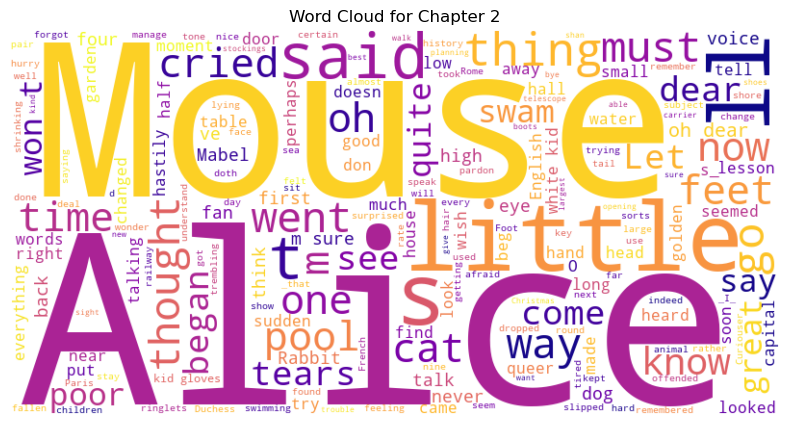

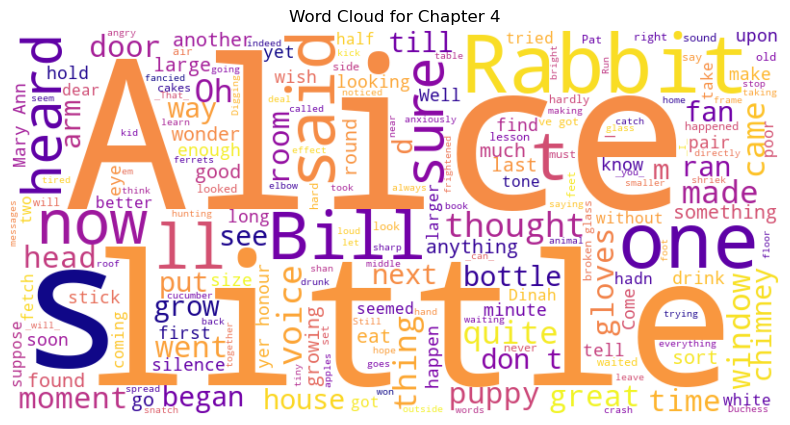

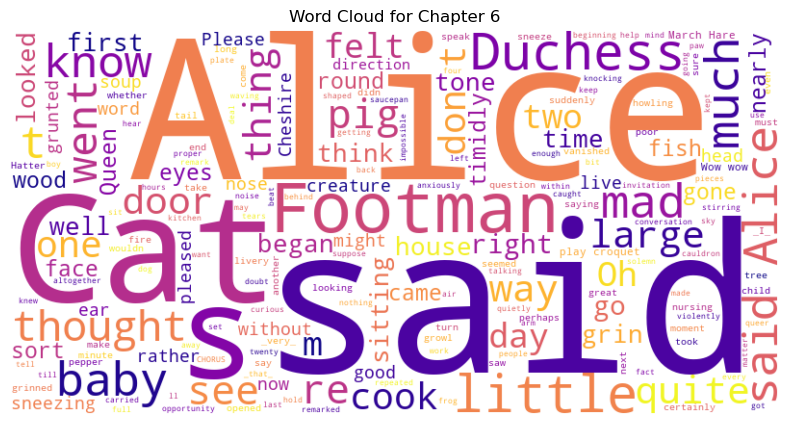

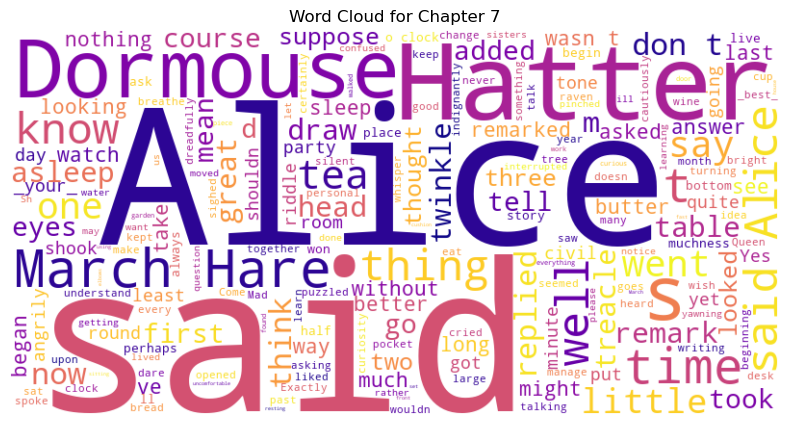

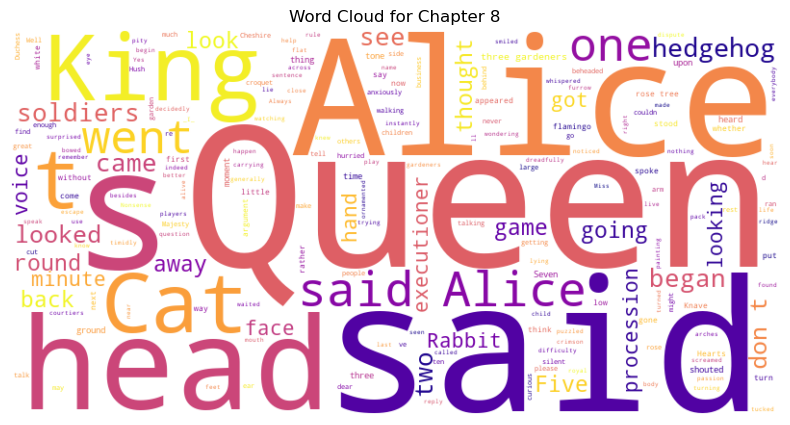

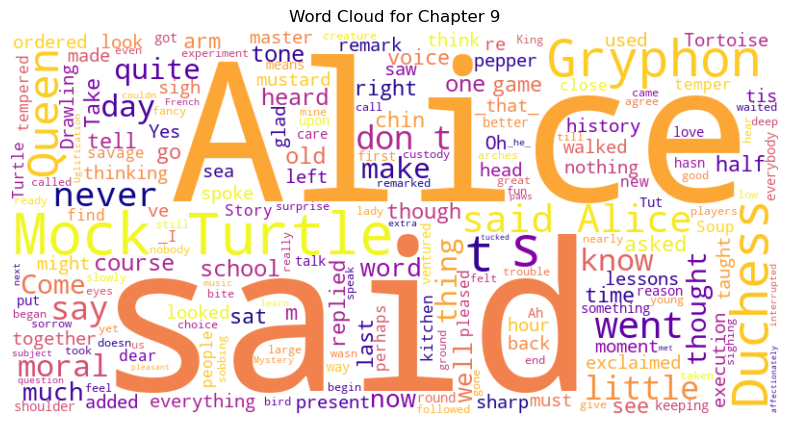

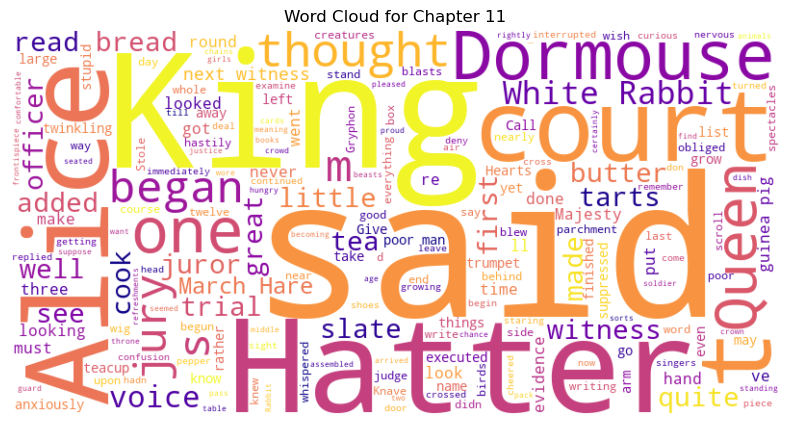

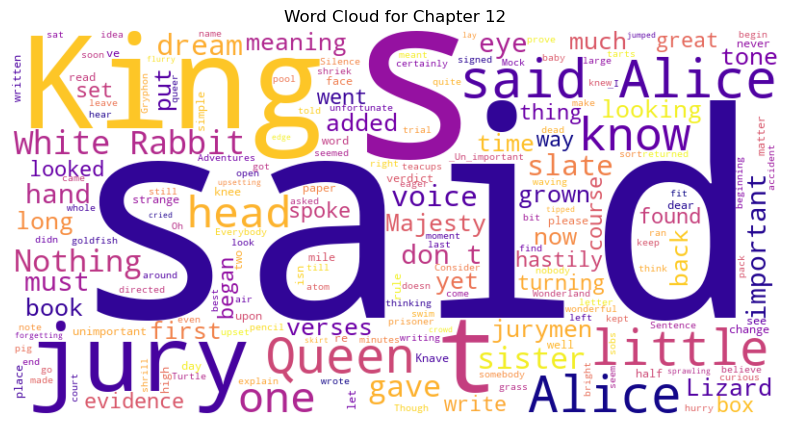

In [75]:
for i, chapter in enumerate(chapters[12:]):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma')
    # alternative colormaps - plasma, viridis, inferno, magma, cividis - loads.  Matplotlib colormaps on Google
    wordcloud.generate(chapter)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Chapter {i+1}')
    plt.axis('off')
    plt.show()
               
    

In [85]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [86]:
analyzer = SentimentIntensityAnalyzer()

In [97]:
sentiment_df = pd.DataFrame(columns=["Chapter", "Compound Score"])

In [99]:
for i, chapter in enumerate(chapters[12:]):
    sentiment_scores = analyzer.polarity_scores(chapter)
    compound_score = sentiment_scores["compound"]
    sentiment_df = sentiment_df.append({"Chapter": f"Chapter {i+1}", "Compound Score": compound_score}, ignore_index=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6288\3120854020.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_df = sentiment_df.append({"Chapter": f"Chapter {i+1}", "Compound Score": compound_score}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6288\3120854020.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_df = sentiment_df.append({"Chapter": f"Chapter {i+1}", "Compound Score": compound_score}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_6288\3120854020.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_df = sentiment_df.append({"Chapter": f"Chapter {i+1}", "Compound Score": compound_score}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipyker

In [100]:
sentiment_df

Chapter  Compound Score
0    Chapter 1          0.9977
1    Chapter 2          0.7555
2    Chapter 3          0.9929
3    Chapter 4          0.9986
4    Chapter 5         -0.7508
5    Chapter 6          0.9040
6    Chapter 7          0.9562
7    Chapter 8          0.9970
8    Chapter 9         -0.9989
9   Chapter 10          0.9748
10  Chapter 11          0.9749
11  Chapter 12          0.9926